In [70]:
# Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade

In [71]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
# !pip install joblib

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [73]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [74]:
#drop koi_disposition column
X= df.drop(["koi_disposition","koi_period_err2"], axis=1)
selected_features = data.columns
X.head()


,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,162.513840,0.003520,-0.003520,0.586,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,175.850252,0.000581,-0.000581,0.969,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,170.307565,0.000115,-0.000115,1.276,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,171.595550,0.001130,-0.001130,0.701,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,172.979370,0.001900,-0.001900,0.762,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [75]:
y= df["koi_disposition"]
y.head()

0         CONFIRMED
1    FALSE POSITIVE
2    FALSE POSITIVE
3         CONFIRMED
4         CONFIRMED
Name: koi_disposition, dtype: object

In [76]:
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.utils import to_categorical

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6122,0,0,0,0,6.768901,7.380000e-05,133.077240,0.008440,-0.008440,0.150,...,-171,4.327,0.153,-0.187,1.125,0.310,-0.207,294.40472,39.351681,14.725
6370,0,1,0,1,0.733726,6.060000e-06,132.020050,0.007950,-0.007950,0.291,...,-175,4.578,0.033,-0.187,0.797,0.211,-0.056,284.50391,42.463860,15.770
2879,1,0,0,0,7.652707,6.540000e-05,134.460380,0.006190,-0.006190,0.970,...,-189,4.481,0.050,-0.200,0.963,0.290,-0.097,295.50211,38.983540,13.099
107,0,0,0,0,7.953547,1.910000e-05,174.662240,0.001820,-0.001820,0.300,...,-85,4.536,0.056,-0.016,0.779,0.023,-0.049,291.15878,40.750271,15.660
29,0,0,0,0,4.959319,5.150000e-07,172.258529,0.000083,-0.000083,0.831,...,-77,4.359,0.110,-0.110,1.082,0.173,-0.130,292.16705,48.727589,15.263


In [78]:
# Label-encode data set
label_encoder= LabelEncoder()

label_encoder.fit(y)
encoded_y= label_encoder.transform(y)

In [79]:
for label, original_class in zip(encoded_y, y):
    print('Original Class:'+ str(original_class))
    print('Encoded Label:' + str(label))
    print("-"*12)

Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CONFIRMED
Encoded Label:1
-----------

Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:FALSE POSITIVE
Encoded

Encoded Label:1
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Clas

------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CONFIRMED
Encoded Label:1
---

------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original C

Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
-----------

Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CANDIDATE
Encoded Labe

Encoded Label:2
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
-------

------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
--------

------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CANDIDATE
Enco

------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:CANDIDATE
Encoded L

Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
-----------

Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE P

------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
-------

Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:CANDIDATE
Encoded Label:0
-----------

------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CANDIDATE

------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original 

Encoded Label:2
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
-

------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CONFIRMED
Encoded Label:1
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class

------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label

Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:FALSE POSITIVE
Encoded Label:2
------------
Original Class:CANDIDATE
Encoded Label:0
------------
Original Class:FA

In [80]:
from keras.utils import to_categorical
#One-hot encoding
one_hot_y = to_categorical(encoded_y)
one_hot_y

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [81]:
X_scaler = StandardScaler().fit(X_train)

#Transform the training and testing data using the X_scaler and y_scaler mdoels
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# K Nearest Neighbors

In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
train_scores = []
test_scores =[]

for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.804
k: 3, Train/Test Score: 0.911/0.831
k: 5, Train/Test Score: 0.889/0.832
k: 7, Train/Test Score: 0.880/0.830
k: 9, Train/Test Score: 0.874/0.829
k: 11, Train/Test Score: 0.870/0.830
k: 13, Train/Test Score: 0.866/0.827
k: 15, Train/Test Score: 0.861/0.824
k: 17, Train/Test Score: 0.860/0.826
k: 19, Train/Test Score: 0.856/0.828


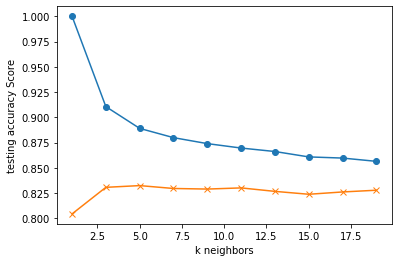

In [84]:
plt.plot(range(1,20,2), train_scores , marker ='o')
plt.plot(range(1,20,2), test_scores , marker ='x')
plt.xlabel("k neighbors")
plt.ylabel("testing accuracy Score")
plt.show()

In [85]:
#k:13 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Accuracy :%.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Accuracy :0.827


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [86]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV

In [87]:
# Train the model with GridSearch
grid_params = {
    'n_neighbors':[3,5,11],
    'weights':['uniform','distance']
}

grid = GridSearchCV(KNeighborsClassifier(), grid_params, verbose=3, n_jobs=1)

In [88]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... n_neighbors=3, weights=uniform, score=0.845, total=   0.5s
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ...... n_neighbors=3, weights=uniform, score=0.820, total=   0.4s
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV] ...... n_neighbors=3, weights=uniform, score=0.824, total=   0.4s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.817, total=   0.4s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.840, total=   0.4s
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.846, total=   0.4s
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.820, total=   0.4s
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.825, total=   0.3s
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.818, total=   0.3s
[CV] n_neighbors=3, weights=distance .................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   11.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=1,
             param_grid={'n_neighbors': [3, 5, 11],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [89]:
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 11, 'weights': 'distance'}
0.8371160465437821


# Save the Model

In [90]:
#save your model
import joblib
filename = 'KNeighborsmodel.sav'
joblib.dump(knn, filename)

['KNeighborsmodel.sav']